<a href="https://colab.research.google.com/github/KatiePeng21/mbti-posture-pain-analysis/blob/main/pandas_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Posture, Personality, and Pain: Do We Carry Our Minds on Our Backs?**
## *Rachel, Katie, Lily, Lena*
We picked this dataset because we wanted to investigate the **correlation between posture and personality**. Does your personality reveal itself through physical appearances such as posture, or does the way you carry yourself change your mind and behavior over time? Bad posture can also lead to other factors such as pain, which can influence your personality as well.

We came up with the central question:

> Is there a significant correlation between an individual's posture, MBTI type, and reported back pain levels?


With these three P’s (Posture, Personality, and Pain), we want to better connect the state of our body to the state of our mind.

### **Background Information**

The **MBTI**, also known as the Myers-Briggs Type Indicator, is a free personality test that aims to categorize people based on character traits such as **introversion/extroversion or logical reasoning/emotional reasoning**. It provides results across **four dichotomies**: extroverts/introverts, sensors/intuitives, thinkers/feelers, and judgers/perceivers. These categories provide a comprehensive overview of a person's cognitive preferences, interpersonal style, and decision-making tendencies. By combining the four dichotomies, the MBTI test offers **16 distinct personality types**, each offering insights into how individuals perceive the world, interact with others, and approach life challenges.

The four types of pain provided in this study correspond to specific regions of the body: **Pain 1 (neck), Pain 2 (thoracic), Pain 3 (lumbar), and Pain 4 (sacral)**. Participants rated the intensity of each pain type on a scale from 1 to 10. In our analysis, we examined pain levels in each region individually and also calculated an average overall pain score by combining ratings from all four areas. This average was then compared across different personality types.

Postures can be grouped into four main categories: **ideal posture (A), kyphosis-lordosis (B), flat back (C), and sway-back (D)**. In terms of severity, they rank from least to most problematic as follows: **A < C < B < D**, where A represents optimal posture, and D places the greatest strain on joints.

### **Dataset Explanation**

This dataset contains data points collected from an **unspecified population** organized by serial number. Each data point contains the **age, height, weight, sex** of the responder as well as their **activity level, pain levels** measured in four different locations, results from a personality inventory (**MBTI**), and their **overall posture**.

There are 97 points of data in the original dataset (97 x 20).

Columns:
* S No *(int; discrete)*: An identifier (serial number) for each participant
* Age *(int; discrete)*: The age of each participant in years
* Height *(int; discrete)*: The height of each participant in inches
* Weight *(int; discrete)*: The weight of each participant in pounds
* Sex *(str; binary)*: The gender of each participant, recorded (Male, Female)
* Activity Level *(str, discrete)*: The activity level of each participant (Low, Moderate, High)
* Pain 1 *(float, continuous)*: The pain each participant feels in their neck (0: low, 10: high)
* Pain 2 *(float, continuous)*: The pain each participant feels in their upper back (thoracic) (0: low, 10: high)
* Pain 3 *(float, continuous)*: The pain each participant feels in their lower back (lumbar) (0: low, 10: high)
* Pain 4 *(float, continuous)*: The pain each participant feels in their hip (sacral) (0: low, 10: high)
* MBTI *(str, discrete)*: The Myers-Briggs personality type of each participant (16 possibilities)
* E *(int, discrete)*: The extroversion of each participant (1-26)
* I *(int, discrete)*: The introversion of each participant (1-26)
* S *(int, discrete)*: The sensing of each participant (1-26)
* N *(int, discrete)*: The intuition of each participant (1-26)
* T *(int, discrete)*: The thinking of each participant (1-26)
* F *(int, discrete)*: The feeling of each participant (1-26)
* J *(int, discrete)*: The judging of each participant (1-26)
* P *(int, discrete)*: The perceiving of each participant (1-26)
* Posture *(str, discrete)*: The spine posture of each participant (A: ideal posture, B: kyphosis-lordosis, C: flat back, D: sway-back)

### **Imports & Data Preprocessing**

Before beginning the data analysis and visualization, we imported the libraries that we will be using: **`pandas`** and **`numpy`** as pd and np (for data analysis), and **`matplotlib.pyplot`** and **`seaborn`** as plt and sns (for data visualization), **`display`** from **`IPython.display`** (for DataFrame visualization), and **`pearsonr`** from **`scipy.stats`** (for finding the Pearson correlation coefficient).

In [ ]:
# Import the necessary libraries into the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.stats import pearsonr
from matplotlib.patches import Patch

Then, we imported the **mbti.csv** file downloaded from the [Kaggle dataset](https://www.kaggle.com/datasets/dhanasekarjaisankar/correlation-between-posture-personality-trait) and cleaned the resulting DataFrame.

In [ ]:
# Import the .csv file
mbti_df = pd.read_csv("mbti.csv")

In [ ]:
# Check for any missing values in the dataset
mbti_df.isnull().sum().sum()

0

In [ ]:
# Check for any duplicates in the dataset and drop any occurences
mbti_df.duplicated(keep="first")
mbti_df = mbti_df.drop_duplicates()

In [ ]:
# Rename columns for better usability
mbti_df = mbti_df.rename(columns={"ACTIVITY LEVEL": "ACTIVITY_LEVEL", "PAIN 1": "PAIN_1", "PAIN 2": "PAIN_2", "PAIN 3": "PAIN_3", "PAIN 4": "PAIN_4"})

In [ ]:
# Create a function for removing outliers using the IQR
def remove_outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  cleaned_df = df[(df[col] >= lower) & (df[col] <= upper)]
  return cleaned_df

# Check data in AGE, HEIGHT, WEIGHT for outliers and drop any occurences
mbti_df = remove_outliers(mbti_df.copy(), "AGE")
mbti_df = remove_outliers(mbti_df.copy(), "HEIGHT")
mbti_df = remove_outliers(mbti_df.copy(), "WEIGHT")

In [ ]:
# Create an AVERAGE_PAIN column with the average of PAIN_1, PAIN_2, PAIN_3, PAIN_4
mbti_df.insert(5, "AVERAGE_PAIN", (mbti_df["PAIN_1"] + mbti_df["PAIN_2"] + mbti_df["PAIN_3"] + mbti_df["PAIN_4"]) / 4)

# Create a BMI column with the Body Mass Index (BMI) of each participant
mbti_df.insert(3, "BMI", 703 * mbti_df["WEIGHT"] / (mbti_df["HEIGHT"] ** 2))

In [ ]:
# Drop redundant or unnecessary columns
mbti_df = mbti_df.drop(columns={"S No", "HEIGHT", "WEIGHT"}) # Drop 'S No' since it serves the same purpose as the index, and 'HEIGHT' + 'WEIGHT' as it is covered by the 'BMI'

### **1. What is the distribution of MBTI types in this dataset?**

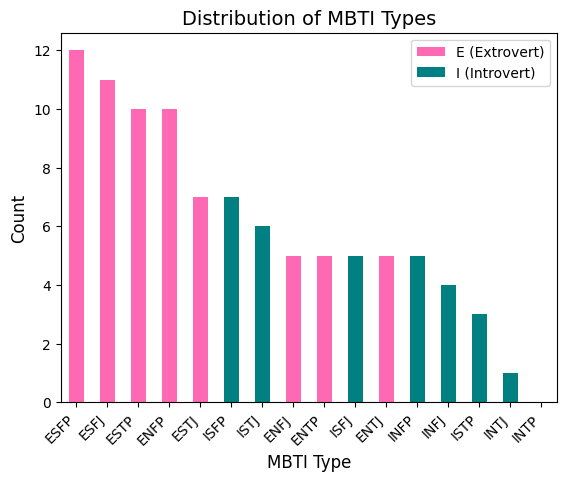

In [ ]:
# Get counts of each MBTI type in the dataset
distribution = mbti_df["MBTI"].value_counts()

# Ensure 'INTP' is included in the plot even if it's missing from the dataset
if "INTP" not in distribution.index:
    distribution["INTP"] = 0

# Define bar colors: extroverts are hotpink, introverts are teal
colors = ["hotpink" if mbti[0] == "E" else "teal" for mbti in distribution.index]

# Create a bar plot of MBTI type counts
distribution.plot.bar(color=colors)

# Add plot title and axis labels
plt.title("Distribution of MBTI Types", fontsize=14)
plt.xlabel("MBTI Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Add custom legend
plt.legend(handles=[
    Patch(facecolor="hotpink", label="E (Extrovert)"),
    Patch(facecolor='teal', label="I (Introvert)")
], fontsize=10)

# Display the plot
plt.show()

The bar graph represents the distribution of MBTI types in the dataset. The **most common MBTI type in our dataset is ESFP**, followed closely by ESFJ, ENFP, and ESTP. This suggests a **skewed personality distribution** that may reflect **sampling bias or an overrepresentation** of certain MBTI types. Additionally, the majority of the participants are extroverts (pink), meaning that there will be an even smaller sample size for introverts (green) and **results for introverts will therefore be less accurate** than results for extroverts. There is also only one data point for INTJs and no data for INTPs, meaning that the two MBTI types will have a significantly less accurate and prominent representation in following analyses to be conducted.

### **2. What is the relationship between MBTI and posture classification?**


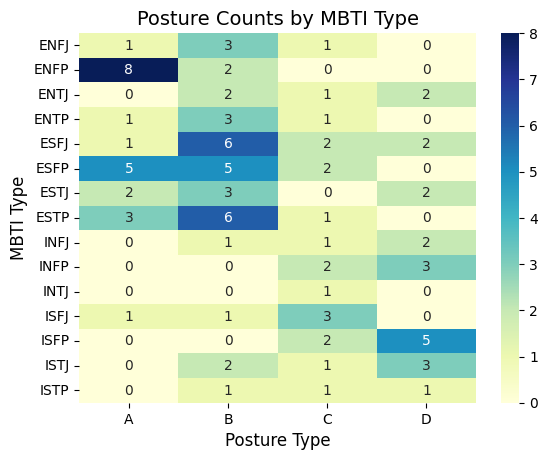

In [ ]:
# Group the data by MBTI type and count how many times each posture type (A, B, C, D) occurs for each MBTI
posture_df = mbti_df.groupby("MBTI")["POSTURE"].value_counts().unstack(fill_value=0)

# Reorder the posture columns to A, B, C, D, remove the column axis label, and reset the index to make MBTI a regular column again
posture_df = posture_df[["A", "B", "C", "D"]].rename_axis(None, axis=1).reset_index()

# Set MBTI as the row index
posture_matrix = posture_df.set_index("MBTI")

# Generate a heatmap to visualize the frequently each posture type for each MBTI type
sns.heatmap(posture_matrix, cmap="YlGnBu", annot=True, fmt="0.0f", annot_kws={"size": 10})

# Add title and axis label to the heatmap
plt.title("Posture Counts by MBTI Type", fontsize=14)
plt.xlabel("Posture Type", fontsize=12)
plt.ylabel("MBTI Type", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Display the heatmap
plt.show()

This heatmap shows the counts of participants by MBTI and their posture category (A-D). ENFPs have the highest count in the ideal posture (type A), while introverted types, such as ISFP and ISTJ, tend to have more entries in worse posture (types C, D). The plot suggests that there is a **potential relationship between MBTI type and posture**. Extroverted types are more frequently found in better posture categories, while most introverted types are more represented in poorer posture categories. However, this pattern is **not consistent across all groups**, as some extroverted types also are found with posture type B (kyphosis-lordosis).

In [ ]:
# Find the most frequently occuring posture for each MBTI type
most_common_posture = posture_df.set_index("MBTI")[["A", "B", "C", "D"]].idxmax(axis=1).reset_index(name='POSTURE')

# Display the most common posture
most_common_posture.style.set_caption("Most Common Posture Type of Each MBTI")

,MBTI,POSTURE
0,ENFJ,B
1,ENFP,A
2,ENTJ,B
3,ENTP,B
4,ESFJ,B
5,ESFP,A
6,ESTJ,B
7,ESTP,B
8,INFJ,D
9,INFP,D


The raw data table shows a subset of the data showing the **most prevalent posture category** assigned to each participant.

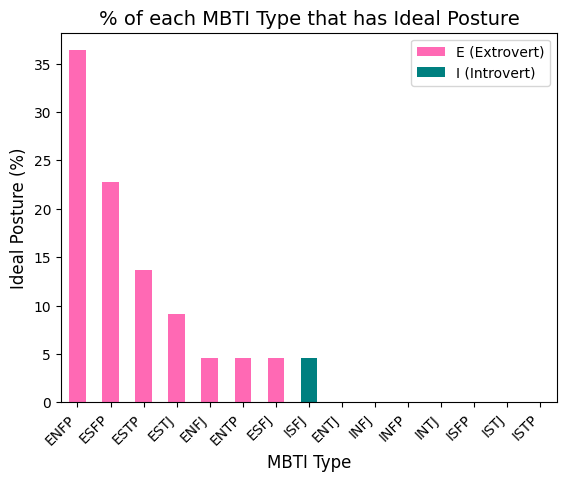

In [ ]:
# Analyze which MBTI type has the best posture, defined as having the largest proportion of Type A posture
best_posture = posture_df[["MBTI", "A"]].copy()

# Calculate the percentage of each MBTI type's contribution to the total number of Type A postures
best_posture.loc[:, "Ideal Posture (%)"] = (best_posture["A"]/best_posture["A"].sum()) * 100
best_posture["Ideal Posture (%)"] = best_posture["Ideal Posture (%)"].round(2)

# Sort the MBTI types by their percentage of Type A posture in descending order
best_posture = best_posture.sort_values("Ideal Posture (%)", ascending=False)

# Define colors: extroverts are pink, introverts are teal
colors = ["hotpink" if mbti[0] == "E" else 'teal' for mbti in best_posture["MBTI"]]

# Create a bar plot showing the percentage of ideal posture for each MBTI type
best_posture.plot.bar(x="MBTI", y="Ideal Posture (%)",color = colors)

# Add title, axis labels, and a custom legend to the bar plot
plt.title("% of each MBTI Type that has Ideal Posture", fontsize=14)
plt.xlabel("MBTI Type", fontsize=12)
plt.ylabel("Ideal Posture (%)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.legend(handles=[Patch(facecolor="hotpink", label="E (Extrovert)"),
                    Patch(facecolor="teal", label="I (Introvert)")], fontsize=10)

# Display the plot
plt.show()

This bar graph shows the proportion of each MBTI type that has the ideal posture. The **extroverted types (pink) tend to have higher percentages of ideal posture** compared to introverted types (green). ENFP has the highest proportion with about 36%, followed by ESFPs and ESTPs. This plot suggests a **possible link between extroversion and better posture**, with the extroverted MBTIs generally showing **higher rates** of "ideal posture."

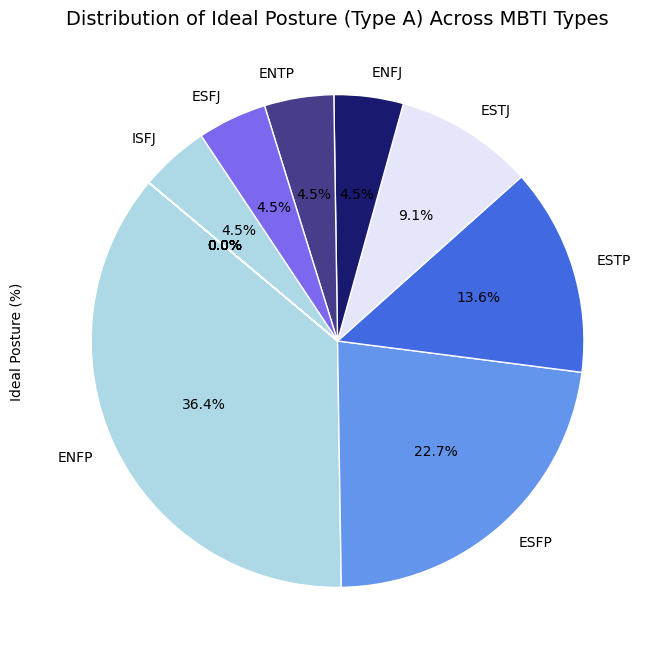

In [ ]:
# Create a pie chart to visualize the distribution of Type A (Ideal Posture) across MBTI types
# Each slice represents the percentage of Type A posture for a specific MBTI type

# MBTI labels for the slices
posture = best_posture["MBTI"]

# Generate the pie chart
best_posture["Ideal Posture (%)"].plot.pie(
    labels=posture,
    colors=["lightblue", "cornflowerblue", "royalblue", "lavender", "midnightblue", "darkslateblue", "mediumslateblue"],
    autopct="%1.1f%%",  # Show percentages on the slices
    startangle=140,     # Rotate the start angle for better layout
    figsize=(8,8),      # Set the figure size
    legend=False,       # Hide legend since labels are on the slices
    wedgeprops={"edgecolor": "white"},  # Improve slice separation visually
    textprops={"fontsize": 10} # Adjust font size of percentages
)

# Add a title to the pie chart
plt.title("Distribution of Ideal Posture (Type A) Across MBTI Types", fontsize=14)

# Display the chart
plt.show()

The data shows that extroverted MBTI types are more likely to have an ideal posture. However, this is a **tentative observation** and is not reliable unless it is tested with a larger sample space.


### **3. How do specific MBTI dichotomies (E/I, S/N, T/F, J/P) relate to posture types?**

After discovering the most common posture type, the range of posture types among all MBTI's, and the MBTI with the best posture, we wanted to know how **dichotomies of MBTI** (each individual letter) affected the participant's posture, and which, if any, had the **greatest and least impact on posture**.

The personality dichotomies of MBTI include the following:

*   Extroverts/Introverts (E/I)
*   Sensors/Intuitives (S/I)
*   Feelers/Thinkers (F/T)
*   Perceivers/Judgers (P/J)



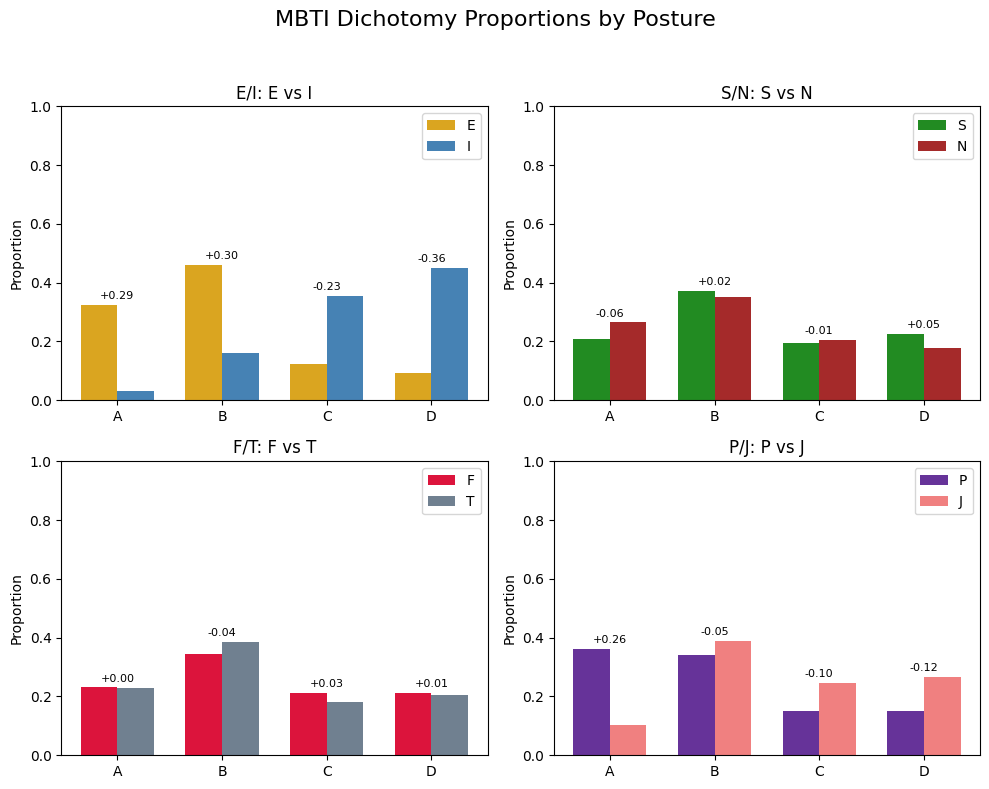

In [ ]:
# Define the MBTI dichotomies
dichotomies = {
  "EI": ["E", "I"],   # Extroversion vs Introversion
  "SN": ["S", "N"],   # Sensing vs Intuition
  "FT": ["F", "T"],   # Feeling vs Thinking
  "PJ": ["P", "J"]    # Perceiving vs Judging
}

# Define colors for each trait
colors = {
  "E": "goldenrod",
  "I": "steelblue",
  "S": "forestgreen",
  "N": "brown",
  "F": "crimson",
  "T": "slategray",
  "P": "rebeccapurple",
  "J": "lightcoral"
}

# Define the posture types (A=ideal, C, B, D=less ideal)
x_vals = ["A", "B", "C", "D"]

# Create a 2x2 subplot layout for the four MBTI dichotomies
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) # Increased figure size
fig.suptitle("MBTI Dichotomy Proportions by Posture", fontsize=16)

# Loop over each dichotomy and plot the posture proportions
for i, (dich, [type1, type2]) in enumerate(dichotomies.items()):
  data_df = mbti_df.copy()  # Start from the full dataset

  # For each person, assign them to 'type1' or 'type2' based on which trait score is higher
  data_df["GROUP"] = np.where(data_df[type1] > data_df[type2], type1, type2)

  # Filter for each group
  group1 = data_df[data_df["GROUP"] == type1]
  group2 = data_df[data_df["GROUP"] == type2]

  # Get normalized counts (percentages) of postures
  counts1 = group1["POSTURE"].value_counts(normalize=True)
  counts2 = group2["POSTURE"].value_counts(normalize=True)

  # Reindex to ensure all postures in x_vals are present
  vals1 = counts1.reindex(x_vals, fill_value=0).values
  vals2 = counts2.reindex(x_vals, fill_value=0).values

  # Prepare for plotting

  # X-axis positions
  x = np.arange(len(x_vals))
  # Bar width
  width = 0.35
  # Get the correct subplot axis
  axis = axes.flat[i]

  # Plot side-by-side bars for each posture type
  axis.bar(x - width/2, vals1, width, label=type1, color=colors[type1])
  axis.bar(x + width/2, vals2, width, label=type2, color=colors[type2])

  # Set titles, labels, ticks
  axis.set_title(f"{dich[0]}/{dich[1]}: {type1} vs {type2}", fontsize=12) # Adjusted title fontsize
  axis.set_xticks(x)
  axis.set_xticklabels(x_vals, fontsize=10) # Adjusted xticks fontsize
  axis.set_ylabel("Proportion", fontsize=10) # Adjusted ylabel fontsize
  axis.set_ylim(0, 1)
  axis.legend(fontsize=10) # Adjusted legend fontsize

  # Annotate bars with the difference in proportions (type1 - type2)
  for idx in range(len(x_vals)):
    diff = vals1[idx] - vals2[idx]
    # Place the text slightly above the taller bar
    axis.text(x[idx], max(vals1[idx], vals2[idx]) + 0.02, f"{diff:+.2f}", ha="center", fontsize=8)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Each subplot above compares an MBTI dichotomy (E/I, S/N, F/T, P/J) across posture categories A-D. The numbers above the bars represent the difference in percent proportion between the two groups for each posture type.


**Extroversion (E) vs Introversion (I)**


>Overall, there seem to be **more extroverts than introverts** in A and B, and more introverts than extroverts in C and D. There is a noticeable trend between extraversion and posture quality. Extroverts are 10.02% more likely to report ideal posture, while introverts are more represented in the worse posture categories. This supports the idea that **E/I can be linked to physical behaviors**, including posture habits.


**Sensing (S) vs Intuition (N)**


>There are very small differences across all posture categories, as the maximum difference is 1.28%. There is a slight tendency for MBTI S to have worse posture, but the S/I dichotomy **does not have a strong relationship with posture** in the dataset.


**Feeling (F) vs Thinking (T)**


>There are very small differences across all posture categories, as the maximum difference is 1.16%. There is a slight tendency for MBTI F to have worse posture, but the F/T dichotomy **does not have a strong relationship with posture** in the dataset.


**Perceiving (P) vs Judging (J)**


>Perceivers have better posture more often than Judgers consistently. However, this pattern becomes less clear in other categories. The P/J dichotomy **does not have a strong relationship with bad posture** in the dataset.



Among the four MBTI categories, **extraversion** shows the strongest relationship with posture.




### **4. Are certain MBTI types more active than others?**

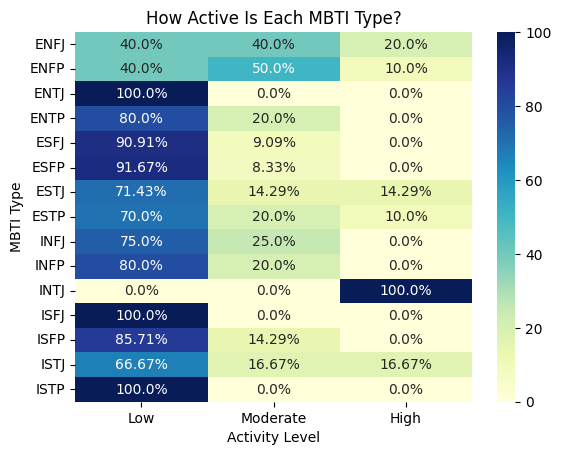

In [ ]:
# Count how many of each activity level for each MBTI
activity_dist = mbti_df.groupby(["MBTI", "ACTIVITY_LEVEL"]).size().unstack(fill_value=0)
# reorder columns to low, med, high
activity_dist = activity_dist[["Low", "Moderate", "High"]]
# Convert counts to percentages
activity_percent = activity_dist.copy()

for index, row in activity_dist.iterrows():
    row_sum = row.sum()
    # Convert counts to percentages
    activity_percent.loc[index] = (row / row_sum) * 100

percent_labels = activity_percent.round(2).astype(str) + "%"

sns.heatmap(
    activity_percent,
    cmap="YlGnBu",     # Yellow to blue color scale
    annot= percent_labels, # Show the numeric percentages in each cell
    fmt=""
)
plt.title("How Active Is Each MBTI Type?")
plt.xlabel("Activity Level")
plt.ylabel("MBTI Type")

plt.show()

The heatmap shows the proportion of each MBTI type that falls into different activity levels (Low, Moderate, High). Regardless of personality type, **most participants fall into the Low activity** group. Some extroverted types, like ESFJ and ESFP, have surprisingly high percentages in the Low activity category, which is **unexpected** given research suggesting that extroverts tend to be more physically active. Overall, the **data does not show a consistent connection** between MBTI type and activity level.

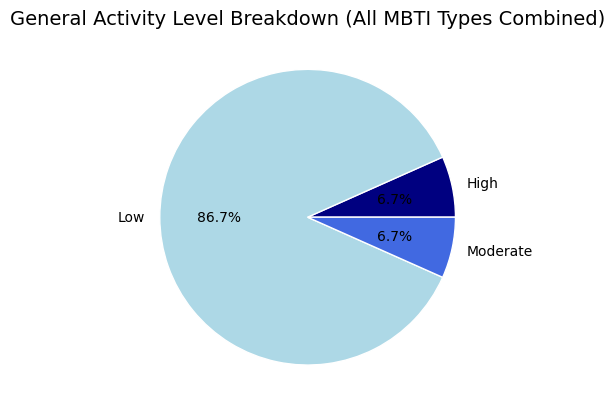

In [ ]:
# Count how many people have each activity level for each MBTI type
activity_mbti_count = mbti_df.groupby(["MBTI", "ACTIVITY_LEVEL"]).size().reset_index(name="COUNT")
# Find the most common activity level for each MBTI type
most_common_activity = activity_mbti_count.loc[activity_mbti_count.groupby("MBTI")["COUNT"].idxmax()]

# Rename the column to make it easier to understand
most_common_activity = most_common_activity.rename(columns={"ACTIVITY_LEVEL": "TOP_ACTIVITY"})

# Count how many MBTI types had each top activity level
activity_summary = most_common_activity.groupby("TOP_ACTIVITY", as_index=False).agg({"COUNT": "count"})

# Make a pie chart
activity_summary["COUNT"].plot.pie(
    labels=activity_summary["TOP_ACTIVITY"],     # Add labels like Low, Moderate, High
    autopct="%1.1f%%",                           # Show percentages
    colors=["navy", "lightblue", "royalblue"],
    wedgeprops={"edgecolor": "white"},            # Add white lines between slices
    textprops={"fontsize": 10} # Adjust font size of percentages and labels
)
plt.title("General Activity Level Breakdown (All MBTI Types Combined)", fontsize=14) # Adjusted title fontsize
plt.ylabel("")  # Take out the y-axis label
plt.show()

Overall, 86.7% of participants report Low activity levels, while only a total of 13.4% report Moderate and High activity levels. This shows a **strong skew toward sedentary behavior** in the dataset, possibly **limiting our ability** to **detect meaningful relationships** between personality and activity level in the dataset.


### **5. Does back pain correlate with posture classification?**

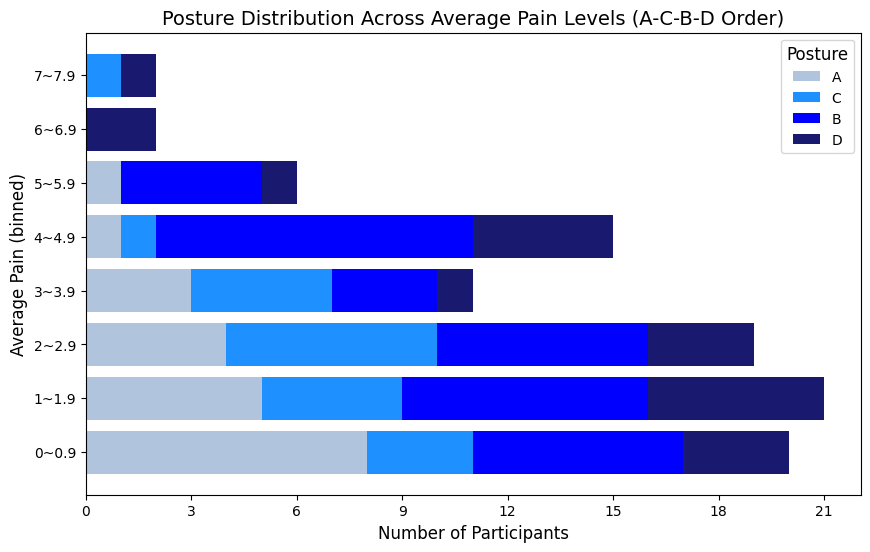

In [ ]:
bins = np.arange(0, 11)  # 0 to 10

# Create labels for the bins to display on the y-axis
pain_labels = [f"{i}~{i+0.9}" for i in bins[:-1]]

# Define custom colors for each posture type
posture_colors = {
  "A": "lightsteelblue",
  "C": "dodgerblue",
  "B": "blue",
  "D": "midnightblue"
}

# Define the order for posture categories
posture_order = ["A", "C", "B", "D"]

# Assign each participant's average pain score to a bin
def binning(value):
    for i in range(len(bins)-1):
        if bins[i] <= value < bins[i+1]:
            return pain_labels[i]

mbti_df["PAIN_BIN"] = mbti_df["AVERAGE_PAIN"].apply(binning)

# Create a contingency table: counts of posture types per pain bin
hist_data = mbti_df.groupby(["PAIN_BIN", "POSTURE"]).size().unstack(fill_value=0)

# Reorder the posture columns to match the set order
hist_data = hist_data.reindex(columns=posture_order, fill_value=0)

# Plotting a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the left position for stacking bars
left = [0] * len(hist_data)

# Loop over each posture type and plot its bar segment
for posture in posture_order:
  # Counts for this posture
  counts = hist_data[posture]

  ax.barh(
      y=hist_data.index.astype(str),  # Pain bins as y-axis labels
      width=counts,                   # Bar widths = counts of participants
      left=left,                      # Stacking position
      label=posture,                  # Legend label
      color=posture_colors[posture]   # Bar color
  )

  # Update the "left" position for the next bar segment
  left += counts

# Add axis labels and title
ax.set_xlabel("Number of Participants", fontsize=12) # Adjusted xlabel fontsize
ax.set_ylabel("Average Pain (binned)", fontsize=12) # Adjusted ylabel fontsize
ax.tick_params(axis="x", labelsize=10) # Adjusted xticks fontsize
ax.tick_params(axis="y", labelsize=10) # Adjusted yticks fontsize
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True)) # Make xticks integers
ax.legend(title="Posture", fontsize=10, title_fontsize=12) # Adjusted legend font sizes
plt.title("Posture Distribution Across Average Pain Levels (A-C-B-D Order)", fontsize=14) # Adjusted title fontsize

# Display the plot
plt.show()

This stacked bar chart shows how different posture types are distributed across average pain levels (in bins from 1-10). This graph suggests a **clear trend between posture and pain levels**, as participants with better posture (A and C) tend to report lower average pain, while participants in worse posture categories (B and D) are more likely to have moderate to high pain levels. **Posture may be linked to back pain**, with poor posture potentially contributing to higher levels of pain.

### **6. Do certain MBTI types have consistently higher pain levels in specific body regions?**


In [ ]:
# Create a dataframe containing only MBTI type and pain-related columns
pain_df = mbti_df[["MBTI", "PAIN_1", "PAIN_2", "PAIN_3", "PAIN_4", "AVERAGE_PAIN"]]

# Group the data by MBTI type and compute the mean pain scores for each group
# This summarizes the average pain reported for each MBTI type
pain_df = pain_df[["MBTI"] + ["PAIN_1", "PAIN_2", "PAIN_3", "PAIN_4", "AVERAGE_PAIN"]].groupby("MBTI").mean().reset_index()

# List of the pain-related columns to round
cols = ["PAIN_1", "PAIN_2", "PAIN_3", "PAIN_4", "AVERAGE_PAIN"]

# Round the columns to the nearest hundredth
pain_df[cols] = pain_df[cols].round(2)

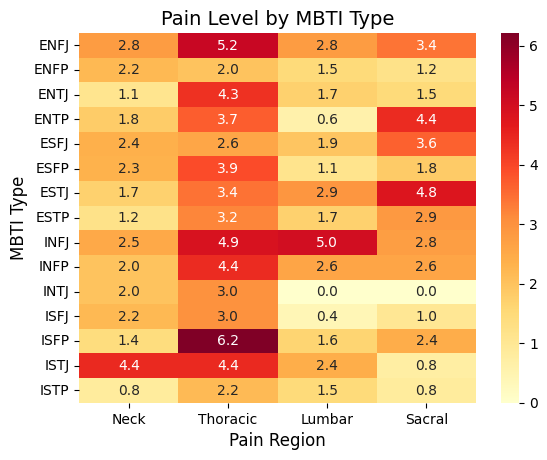

In [ ]:
# Prepare the data for heatmap visualization by removing 'AVERAGE_PAIN'
pain_matrix = pain_df.drop(columns=["AVERAGE_PAIN"])

# Rename the pain columns to specific locations
pain_matrix = pain_matrix.rename(columns={
    "PAIN_1": "Neck",
    "PAIN_2": "Thoracic",
    "PAIN_3": "Lumbar",
    "PAIN_4": "Sacral"
})

# Set MBTI as the index so each MBTI type is a row in the heatmap
pain_matrix = pain_matrix.set_index("MBTI")

# Generate a heatmap showing the average pain levels for each MBTI type across body regions
sns.heatmap(
    pain_matrix,
    cmap="YlOrRd",     # Yellow to red color scale
    annot=True,        # Show the numeric values in each cell
    fmt=".1f",          # Format the annotations to 1 decimal place
    annot_kws={"size": 10} # Adjust font size of annotations
)

# Add plot title and axis labels
plt.title("Pain Level by MBTI Type", fontsize=14) # Adjusted title fontsize
plt.xlabel("Pain Region", fontsize=12) # Adjusted xlabel fontsize
plt.ylabel("MBTI Type", fontsize=12) # Adjusted ylabel fontsize
plt.xticks(fontsize=10) # Adjusted xticks fontsize
plt.yticks(fontsize=10) # Adjusted yticks fontsize

# Display the plot
plt.show()

From the heatmap, we can see that **thoracic (upper back) pain is the most prevalent across all MBTI types**, with many personalities reporting moderate to high levels of discomfort. Notably, ISFP stands out, experiencing a pain level of 6.2, **the highest among all types**. In contrast, lumbar (lower back) pain is generally mild to moderate, although ISTP and INFJ report relatively higher levels at 3.6 and 5.0, respectively. **This trend may raise questions about the validity of the dataset**, as lower back pain is typically more common than upper back pain. According to Penn Medicine, the lumbar region is the most frequent site of back pain due to its role in supporting body weight and facilitating movement, which makes it more prone to injury and wear.

Interestingly, **sacral (hip) pain appears more common among extroverted types than introverts**. While this may be coincidental, it could also reflect behavioral patterns. Research from University College London found that extroverts are more likely to engage in high-intensity physical activities, particularly those involving social interaction, such as HIIT and maximum-effort cycling. These types of high-impact and repetitive movements are known risk factors for hip pain, potentially explaining the trend. **However, our dataset does not support this general trend**, as the majority of participants reported low levels of physical activity. In addition, of those who did report moderate activity, most were extroverted.

**Neck pain is generally low across most MBTI types**, with minimal discomfort reported. An exception is the ISTJ type, which stands out with a neck pain level of 4.4.

**There are clear differences in reported pain levels between MBTI types and across body regions**. Some personalities, like INFJ and ENFJ, report higher overall pain, while others, like ISTP and INTJ, report much lower levels.


###**7. Do women with good posture have the same MBTI as men with good posture?**

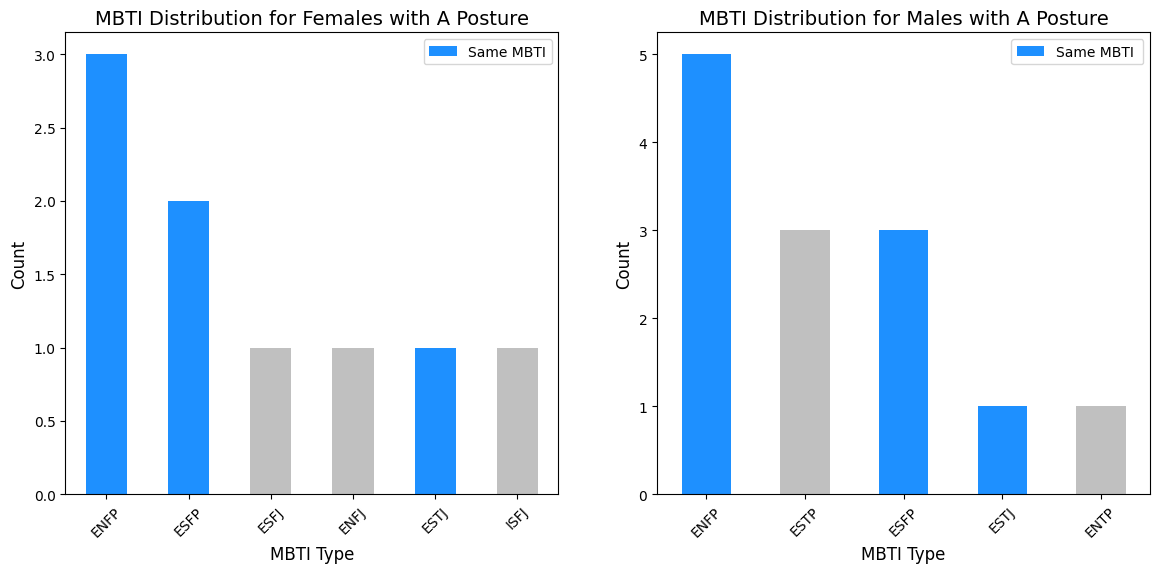

In [ ]:
# Filter the dataframe for females with "A" posture
female_A_posture_df = mbti_df[(mbti_df["SEX"] == "Female") & (mbti_df["POSTURE"] == "A")]

# Filter the dataframe for males with "A" posture
male_A_posture_df = mbti_df[(mbti_df["SEX"] == "Male") & (mbti_df["POSTURE"] == "A")]

# Get the MBTI distribution for females with "A" posture
female_mbti_distribution = female_A_posture_df["MBTI"].value_counts()

# Get the MBTI distribution for males with "A" posture
male_mbti_distribution = male_A_posture_df["MBTI"].value_counts()

# Find shared MBTI types
common_mbti = female_mbti_distribution.index.intersection(male_mbti_distribution.index)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Increased figure size

# Plot the distribution for females and highlight common types
colors_female = ["dodgerblue" if mbti in common_mbti else "silver" for mbti in female_mbti_distribution.index]
female_mbti_distribution.plot.bar(ax=axes[0], color=colors_female, label="Same MBTI")
axes[0].set_title("MBTI Distribution for Females with A Posture", fontsize=14) # Adjusted title fontsize
axes[0].set_xlabel("MBTI Type", fontsize=12) # Adjusted xlabel fontsize
axes[0].set_ylabel("Count", fontsize=12) # Adjusted ylabel fontsize
axes[0].tick_params(axis="x", rotation=45, labelsize=10) # Adjusted xticks fontsize
axes[0].tick_params(axis="y", labelsize=10) # Adjusted yticks fontsize
axes[0].legend(["Same MBTI"], fontsize=10) # Corrected legend labels and adjusted fontsize


# Plot the distribution for males and highlight common types
colors_male = ["dodgerblue" if mbti in common_mbti else "silver" for mbti in male_mbti_distribution.index]
male_mbti_distribution.plot.bar(ax=axes[1], color=colors_male, label="Same MBTI")
axes[1].set_title("MBTI Distribution for Males with A Posture", fontsize=14) # Adjusted title fontsize
axes[1].set_xlabel("MBTI Type", fontsize=12) # Adjusted xlabel fontsize
axes[1].set_ylabel("Count", fontsize=12) # Adjusted ylabel fontsize
axes[1].tick_params(axis="x", rotation=45, labelsize=10) # Adjusted xticks fontsize
axes[1].tick_params(axis="y", labelsize=10) # Adjusted yticks fontsize
axes[1].legend(["Same MBTI ", "Different"], fontsize=10) # Corrected legend labels and adjusted fontsize

plt.show()

The bar graphs display the MBTI types of participants who have the ideal posture, separated by gender. Blue bars represent MBTI types that appear in both genders, while gray bars are unique to one gender. Both males and females with ideal posture tend to be ENFP or ESFP, suggesting that **these personality types may have a higher chance of having good posture regardless of gender**.

### **8. Can you predict back pain based on posture, MBTI traits, activity level, and demographics?**

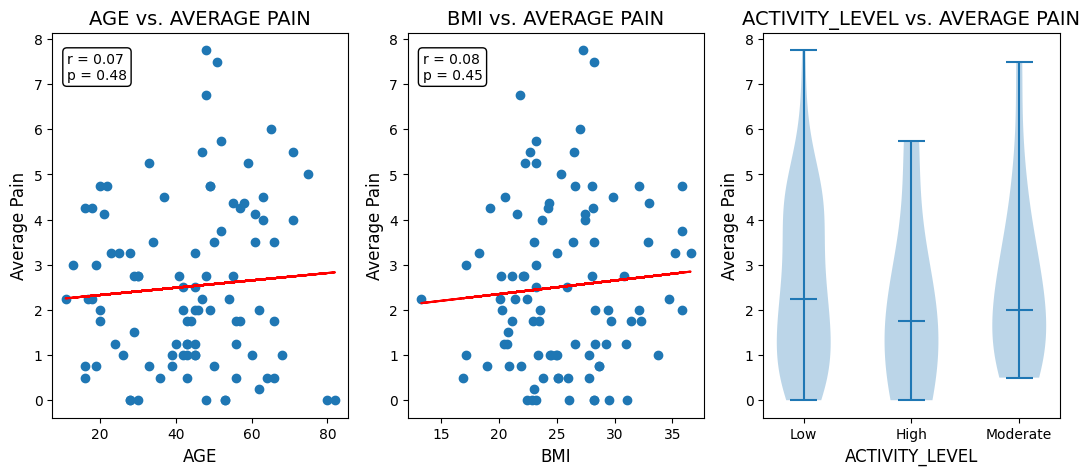

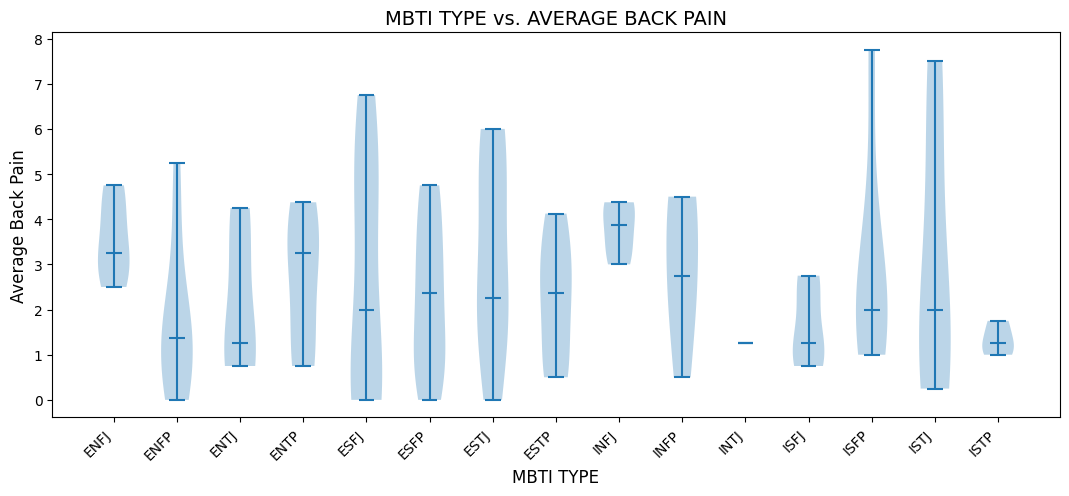

In [ ]:
# Variables to compare with back pain
variables = ["AGE", "BMI", "ACTIVITY_LEVEL"]

# Create 1x3 subplot grid for scatter/violin plots
fig, axes = plt.subplots(1, 3, figsize=(13, 5)) # Increased figure size
axes = axes.flatten()

# Loop through variables
for i, var in enumerate(variables):
    if var in ["AGE", "BMI"]:  # Scatter plots
        x = mbti_df[var]
        y = mbti_df["AVERAGE_PAIN"]

        # Scatter plot
        axes[i].scatter(x, y)

        # Calculate Pearson correlation coefficient
        correlation_coefficient, p_value = pearsonr(x, y)

        # Linear regression fit
        m, b = np.polyfit(x, y, 1)
        axes[i].plot(x, m*x + b, color="red", label="Regression Line")

        # Add labels and title
        axes[i].set_title(f"{var} vs. AVERAGE PAIN", fontsize=14) # Adjusted title fontsize
        axes[i].set_xlabel(var, fontsize=12) # Adjusted xlabel fontsize
        axes[i].set_ylabel("Average Pain", fontsize=12) # Adjusted ylabel fontsize
        axes[i].tick_params(axis="x", labelsize=10) # Adjusted xticks fontsize
        axes[i].tick_params(axis="y", labelsize=10) # Adjusted yticks fontsize


        # Display correlation stats as text box
        textstr = f"r = {correlation_coefficient:.2f}\np = {p_value:.2f}"
        axes[i].text(0.05, 0.95, textstr, transform=axes[i].transAxes,
                     fontsize=10, verticalalignment="top",
                     bbox=dict(boxstyle="round", facecolor="white"))

    else:  # Violin plot
        categories = mbti_df[var].unique()
        data = [mbti_df[mbti_df[var] == i]["AVERAGE_PAIN"] for i in categories]

        axes[i].violinplot(data, showmedians=True)
        axes[i].set_title(f"{var} vs. AVERAGE PAIN", fontsize=14) # Adjusted title fontsize
        axes[i].set_xlabel(var, fontsize=12) # Adjusted xlabel fontsize
        axes[i].set_ylabel("Average Pain", fontsize=12) # Adjusted ylabel fontsize

        axes[i].set_xticks(range(1, len(categories)+1))
        axes[i].set_xticklabels(categories, fontsize=10) # Adjusted xticklabels fontsize
        axes[i].tick_params(axis="y", labelsize=10) # Adjusted yticks fontsize

plt.show()

# Prepare data for MBTI pain distribution plot
mbti_types = sorted(mbti_df["MBTI"].unique())
data = [mbti_df[mbti_df["MBTI"] == mbti]["AVERAGE_PAIN"] for mbti in mbti_types]

# Create a violin plot for MBTI types
plt.figure(figsize=(13, 5))
plt.violinplot(data, showmedians=True)

plt.xticks(range(1, len(mbti_types) + 1), mbti_types, rotation=45, ha='right', fontsize=10) # Adjusted xticks font size and rotation
plt.title("MBTI TYPE vs. AVERAGE BACK PAIN", fontsize=14) # Adjusted title fontsize
plt.xlabel("MBTI TYPE", fontsize=12) # Adjusted xlabel fontsize
plt.ylabel("Average Back Pain", fontsize=12) # Adjusted ylabel fontsize
plt.yticks(fontsize=10) # Adjusted yticks fontsize

plt.show()

The relationship between average pain and age/BMI was represented through a scatter plot as they had continuous values. For each plot, an **r-value (Pearson's correlation coefficient) and p-value was found**. A small p-value (< 0.05) suggests that the correlation is unlikely to have occurred by chance and show that there is a statistically significant correlation. A large p-value (> 0.05) suggests that the correlation could have easily occurred by chance, and there could have been no true correlation in the population.

The Age vs Average Pain scatterplot shows a very weak positive correlation between age and average pain. the p-value is 0.48, meaning there is no statistically significant relationship.

The BMI vs Average Pain scatterplot also shows a very weak positive correlation between BMI and average pain. the p-value is 0.45, meaning there is no statistically significant relationship.

Therefore, age or BMI doesn't seem to have a notable relationship with the average back pain level of the participants in this dataset.

The Activity Level vs Average Pain violin plot shows that pain levels are slightly lower for participants in the High and Moderate activity groups compared to Low activity. The Low activity group also shows a wider pain distribution, including more high pain reports, compared to the High and Moderate activity groups, who have a lower median pain and less spread at the top. This suggests that lower activity levels may lead to higher or more variable pain.

The MBTI vs Average Pain violin plot shows noticeable differences in pain distributions across MBTI types. Some types, such as ISFP and ESFJ have larger spreads and higher maximum pain reports, while other types like ISTP and INTP have smaller spreads and lower pain levels (although this could be due to smaller sample sizes).

Although age and BMI do not show meaningful relationships with pain, physical activity may have a small protective effect, and MBTI types could influence how individuals experience or report back pain.

### **Conclusion**

In this project, we explored the relationships between an individual's **posture, personality (MBTI), and back pain levels** through a dataset of 97 values. The analyses and investigation focused on **three core questions**:


1.   **Is there a correlation between MBTI personality types and posture?**

There was no strong or consistent correlation between MBTI types and posture. However, a notable relationship was found between posture and the MBTI dichotomy of "Extraversion vs Introversion," with results showing that **extroverts have a greater chance of having an ideal posture** compared to introverts.


2.   **Is there a correlation between posture and pain levels?**

Participants with more severe postural issues (kyphosis-lordosis, sway-back) reported higher average pain scores, especially in the neck and lumbar regions. In line with existing medical discoveries, the data suggests **a strong relationship between posture and back pain**.


3.   **Is there a correlation between MBTI types and pain?**

The analysis did not demonstrate a significant correlation between MBTI types and pain levels. However, it was found that certain types may **report pain differently or more often**, although these trends were not verified with larger data.

**Summary:**

Because the dataset was **small and skewed** (especially among introverts and rarer MBTI types), the strengths of the conclusions regarding personality are overall weak. However, the data suggested a **clear relationship between posture and pain**. To properly understand the relationships regarding personality, a **larger, more balanced sample is required**.